# **ESG Portfolio Performance Analysis: A Comparative Study of Top and Bottom ESG Risk Scores**

## **Introduction**
Environmental, Social, and Governance (ESG) factors have gained significant attention in recent years as investors increasingly seek to align their portfolios with sustainability and ethical considerations. This study aims to analyze the performance of portfolios constructed based on ESG risk scores. Specifically, it compares the performance of portfolios comprising stocks with the highest and lowest ESG risk scores. The analysis utilizes data from Yahoo Finance, S&P 500 ESG Risk Ratings, risk-free rate data from FRED, and Fama-French factors. The study period spans from January 2000 to June 2024.

## **Datasets**
- **Yahoo Finance dataset from yfinance package**: Used to gather stock price data for S&P 500 companies.
- **S&P 500 ESG Risk Ratings from Kaggle (SP 500 ESG Risk Ratings.csv)**: Contains ESG risk scores for S&P 500 companies. [Dataset link](https://www.kaggle.com/datasets/pritish509/s-and-p-500-esg-risk-ratings)
- **Risk-free rate data from FRED (DTB3.csv)**: Provides the daily risk-free rate. [Dataset link](https://fred.stlouisfed.org/series/DTB3)
- **Fama-French factors dataset**: Includes daily Fama-French factors. [Dataset link](https://github.com/bashtage/python-introduction/blob/main/course/autumn/data/F-F_Research_Data_Factors_daily.csv)


## **1. Data Collection**

In [2]:
import yfinance as yf
import pandas as pd

# Define the time period
start_date = "2000-01-01"
end_date = "2024-06-30"

# Load the ESG data
esg_data_path = 'SP 500 ESG Risk Ratings.csv'
esg_data = pd.read_csv(esg_data_path)

# Extract the list of tickers from the ESG data
tickers = esg_data['Symbol'].unique().tolist()

# Download stock data
stock_data = yf.download(tickers, start=start_date, end=end_date)

# Filter out delisted or missing stocks
valid_tickers = [ticker for ticker in tickers if ticker in stock_data.columns.levels[1]]

# Download stock data again with valid tickers
stock_data = yf.download(valid_tickers, start=start_date, end=end_date)

# Save the stock data to a CSV file
stock_data.to_csv('stock_data.csv')

# Display the first few rows of the stock data
print(stock_data.head())


[*****************     36%%                      ]  180 of 503 completed

$BF.B: possibly delisted; No price data found  (1d 2000-01-01 -> 2024-06-30)


[*********************100%%**********************]  503 of 503 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['BF.B']: YFPricesMissingError('$%ticker%: possibly delisted; No price data found  (1d 2000-01-01 -> 2024-06-30)')
[*****************     36%%                      ]  180 of 503 completed

$BF.B: possibly delisted; No price data found  (1d 2000-01-01 -> 2024-06-30)


[*********************100%%**********************]  503 of 503 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['BF.B']: YFPricesMissingError('$%ticker%: possibly delisted; No price data found  (1d 2000-01-01 -> 2024-06-30)')


Price       Adj Close                                                  \
Ticker              A AAL      AAPL ABBV ABNB       ABT      ACGL ACN   
Date                                                                    
2000-01-03  43.532211 NaN  0.844981  NaN  NaN  8.327242  1.277778 NaN   
2000-01-04  40.206848 NaN  0.773740  NaN  NaN  8.089320  1.270833 NaN   
2000-01-05  37.712811 NaN  0.785063  NaN  NaN  8.074454  1.388889 NaN   
2000-01-06  36.276848 NaN  0.717125  NaN  NaN  8.356982  1.375000 NaN   
2000-01-07  39.299919 NaN  0.751094  NaN  NaN  8.446206  1.451389 NaN   

Price                             ... Volume                                   \
Ticker           ADBE        ADI  ...    WTW       WY WYNN      XEL       XOM   
Date                              ...                                           
2000-01-03  16.274673  28.325624  ...    NaN   973700  NaN  2738600  13458200   
2000-01-04  14.909399  26.892654  ...    NaN  1201700  NaN   425200  14510800   
2000-01-05

In [3]:
# Reshape stock data to have a single level column index
stock_data = stock_data.stack(level=1).reset_index()
stock_data.columns = ['Date', 'Ticker', 'Adj Close', 'Close', 'High', 'Low', 'Open', 'Volume']

# Display the reshaped stock data
print(stock_data.head())


        Date Ticker  Adj Close      Close       High        Low       Open  \
0 2000-01-03      A  43.532211  51.502148  56.464592  48.193848  56.330471   
1 2000-01-03   AAPL   0.844981   0.999442   1.004464   0.907924   0.936384   
2 2000-01-03    ABT   8.327242  15.711531  16.160433  15.599306  15.823756   
3 2000-01-03   ACGL   1.277778   1.277778   1.416667   1.263889   1.409722   
4 2000-01-03   ADBE  16.274673  16.390625  16.875000  16.062500  16.812500   

        Volume  
0    4674353.0  
1  535796800.0  
2   10635087.0  
3     433800.0  
4    7384400.0  


In [4]:
# Convert ESG data Date column to datetime format if necessary
if 'Date' in esg_data.columns:
    esg_data['Date'] = pd.to_datetime(esg_data['Date'])

# Merge stock data with ESG scores
combined_data = pd.merge(stock_data, esg_data, how='left', left_on='Ticker', right_on='Symbol')

# Display the combined dataset
print(combined_data.head())

# Save the combined data to a new CSV file if needed
combined_data.to_csv('combined_stock_esg_data.csv', index=False)


        Date Ticker  Adj Close      Close       High        Low       Open  \
0 2000-01-03      A  43.532211  51.502148  56.464592  48.193848  56.330471   
1 2000-01-03   AAPL   0.844981   0.999442   1.004464   0.907924   0.936384   
2 2000-01-03    ABT   8.327242  15.711531  16.160433  15.599306  15.823756   
3 2000-01-03   ACGL   1.277778   1.277778   1.416667   1.263889   1.409722   
4 2000-01-03   ADBE  16.274673  16.390625  16.875000  16.062500  16.812500   

        Volume Symbol                       Name  ... Full Time Employees  \
0    4674353.0      A  Agilent Technologies Inc.  ...              18,000   
1  535796800.0   AAPL                 Apple Inc.  ...             150,000   
2   10635087.0    ABT        Abbott Laboratories  ...             114,000   
3     433800.0   ACGL     Arch Capital Group Ltd  ...               6,400   
4    7384400.0   ADBE                 Adobe Inc.  ...              29,945   

                                         Description Total ESG Risk 

In [5]:
# Check initial data information
print(combined_data.info())

# Check for missing values
missing_values = combined_data.isnull().sum()
print("\nMissing Values in Each Column:\n", missing_values)

# Check for duplicates
duplicates = combined_data.duplicated().sum()
print("\nNumber of Duplicate Rows:", duplicates)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2747762 entries, 0 to 2747761
Data columns (total 23 columns):
 #   Column                  Dtype         
---  ------                  -----         
 0   Date                    datetime64[ns]
 1   Ticker                  object        
 2   Adj Close               float64       
 3   Close                   float64       
 4   High                    float64       
 5   Low                     float64       
 6   Open                    float64       
 7   Volume                  float64       
 8   Symbol                  object        
 9   Name                    object        
 10  Address                 object        
 11  Sector                  object        
 12  Industry                object        
 13  Full Time Employees     object        
 14  Description             object        
 15  Total ESG Risk score    float64       
 16  Environment Risk Score  float64       
 17  Governance Risk Score   float64       
 18  So

### **Missing Values Heatmap Before Cleaning**

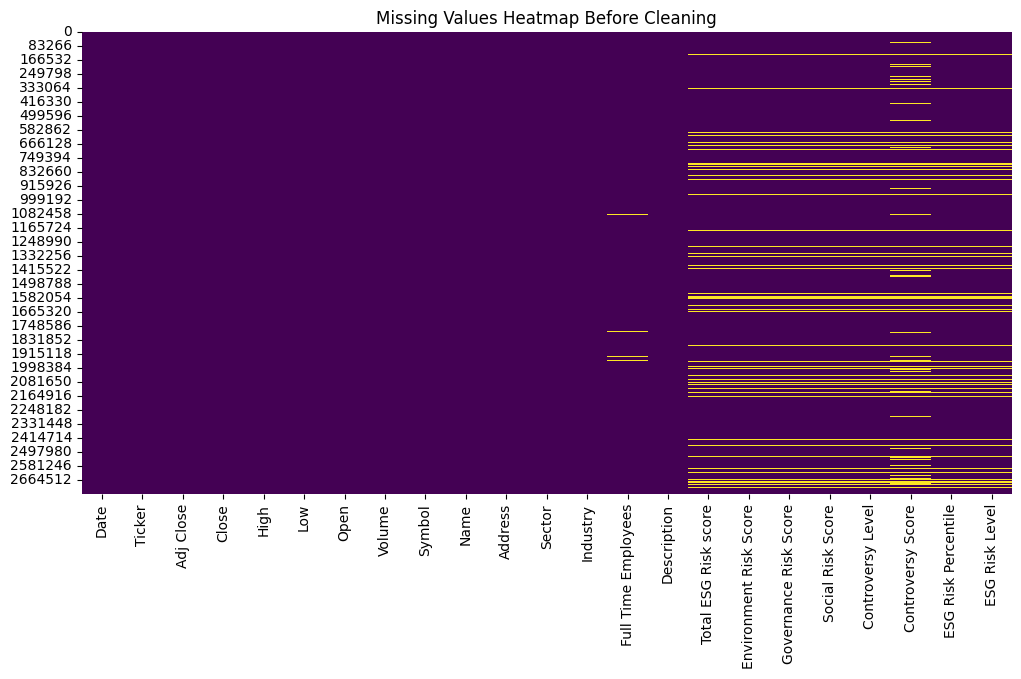

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot missing values heatmap before cleaning
plt.figure(figsize=(12, 6))
sns.heatmap(combined_data.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap Before Cleaning')
plt.show()

- **Observation**: The heatmap reveals substantial missing values in several columns, particularly in ESG-related fields such as Total ESG Risk score, Environment Risk Score, Governance Risk Score, and Social Risk Score. This indicates the need for data cleaning to ensure robust analysis.

In [8]:
# Drop rows with missing values
cleaned_data = combined_data.dropna()

# Check data information after dropping missing values
print("\nData Info After Dropping Missing Values:\n", cleaned_data.info())

# Check for missing values again to ensure they have been dropped
missing_values_after_cleaning = cleaned_data.isnull().sum()
print("\nMissing Values in Each Column After Cleaning:\n", missing_values_after_cleaning)


<class 'pandas.core.frame.DataFrame'>
Index: 2304332 entries, 0 to 2747761
Data columns (total 23 columns):
 #   Column                  Dtype         
---  ------                  -----         
 0   Date                    datetime64[ns]
 1   Ticker                  object        
 2   Adj Close               float64       
 3   Close                   float64       
 4   High                    float64       
 5   Low                     float64       
 6   Open                    float64       
 7   Volume                  float64       
 8   Symbol                  object        
 9   Name                    object        
 10  Address                 object        
 11  Sector                  object        
 12  Industry                object        
 13  Full Time Employees     object        
 14  Description             object        
 15  Total ESG Risk score    float64       
 16  Environment Risk Score  float64       
 17  Governance Risk Score   float64       
 18  Social 

In [14]:
# Save the cleaned combined data to a new CSV file
cleaned_data.to_csv('cleaned_combined_stock_esg_data.csv', index=False)

# Display the first few rows of the cleaned data
print("\nCleaned Combined Data:\n", cleaned_data.head())


Cleaned Combined Data:
          Date Ticker  Adj Close      Close       High        Low       Open  \
0  2000-01-03      A  43.532211  51.502148  56.464592  48.193848  56.330471   
1  2000-01-03   AAPL   0.844981   0.999442   1.004464   0.907924   0.936384   
2  2000-01-03    ABT   8.327242  15.711531  16.160433  15.599306  15.823756   
3  2000-01-03   ACGL   1.277778   1.277778   1.416667   1.263889   1.409722   
4  2000-01-03   ADBE  16.274673  16.390625  16.875000  16.062500  16.812500   

        Volume Symbol                       Name  ...  \
0    4674353.0      A  Agilent Technologies Inc.  ...   
1  535796800.0   AAPL                 Apple Inc.  ...   
2   10635087.0    ABT        Abbott Laboratories  ...   
3     433800.0   ACGL     Arch Capital Group Ltd  ...   
4    7384400.0   ADBE                 Adobe Inc.  ...   

                                         Description Total ESG Risk score  \
0  Agilent Technologies, Inc. provides applicatio...                 13.6   
1  

### **Stock Prices Over Time**

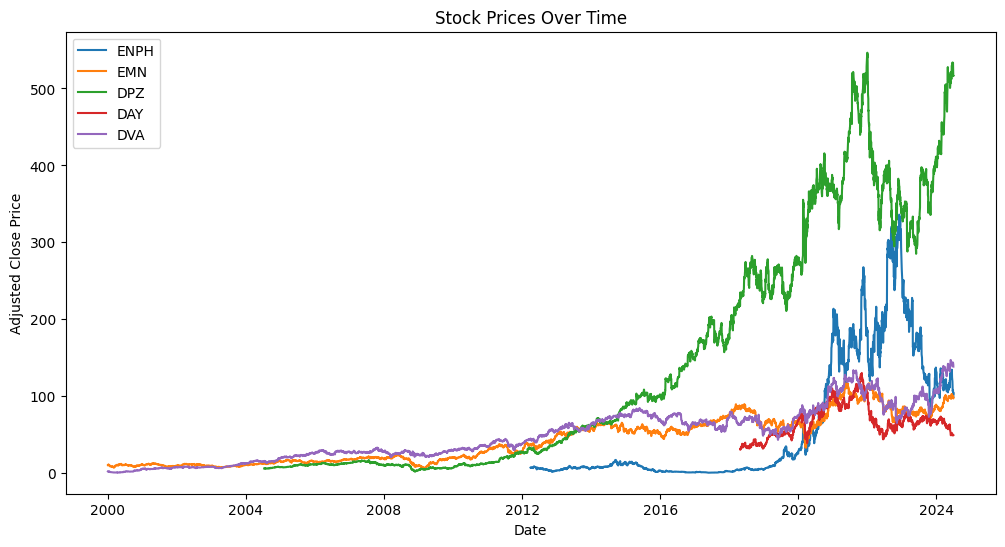

In [11]:
# Plot stock prices of a few stocks over time
sample_tickers = valid_tickers[:5]
sample_data = stock_data[stock_data['Ticker'].isin(sample_tickers)]
plt.figure(figsize=(12, 6))
for ticker in sample_tickers:
    plt.plot(sample_data[sample_data['Ticker'] == ticker]['Date'], sample_data[sample_data['Ticker'] == ticker]['Adj Close'], label=ticker)
plt.title('Stock Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Adjusted Close Price')
plt.legend()
plt.show()

- **Observation**: The plot of stock prices for selected companies (e.g., ENPH, EMN, DPZ, DAY, DVA) from 2000 to 2024 illustrate significant growth for ENPH and DPZ, reflecting strong market performance. In contrast, other stocks show more modest growth or volatility, emphasizing the varied market behavior among different companies.

### **Distribution of Total ESG Risk Scores**

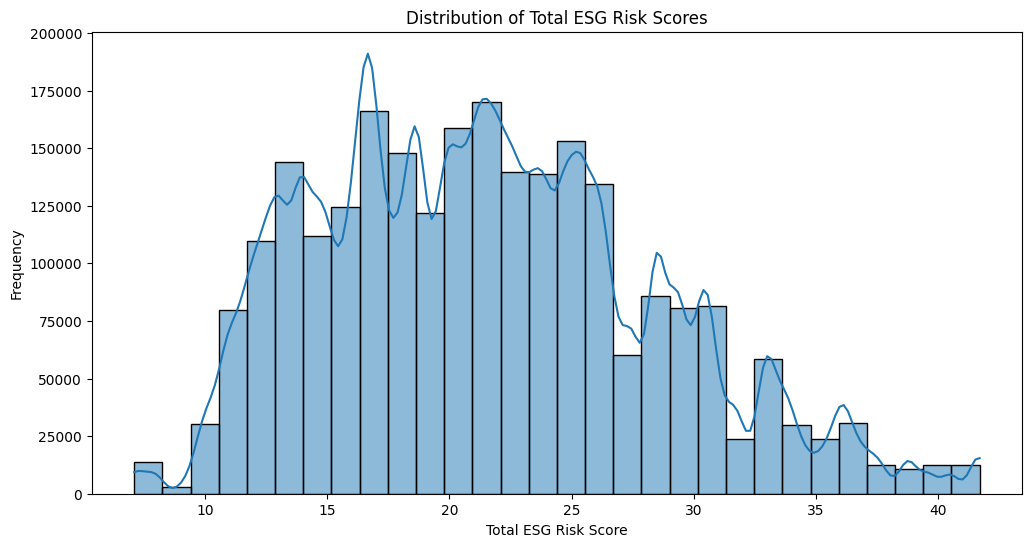

In [12]:
# Plot ESG scores distribution
plt.figure(figsize=(12, 6))
sns.histplot(combined_data['Total ESG Risk score'].dropna(), bins=30, kde=True)
plt.title('Distribution of Total ESG Risk Scores')
plt.xlabel('Total ESG Risk Score')
plt.ylabel('Frequency')
plt.show()

- **Observation**: The histogram of ESG risk scores display a wide distribution with peaks around lower values, indicating that many companies have relatively low ESG risk scores. This suggests a general trend towards better ESG performance within the S&P 500 companies.


## **2. Portfolio Construction**

In [15]:
# Load the cleaned combined data
cleaned_data_path = 'cleaned_combined_stock_esg_data.csv'
cleaned_data = pd.read_csv(cleaned_data_path)

# Ensure data is sorted by Date and Ticker
cleaned_data = cleaned_data.sort_values(by=['Date', 'Ticker'])

# Function to create 'Top' and 'Bottom' portfolios
def create_portfolios(data, score_column, top_percentile=0.1, bottom_percentile=0.1):
    # Rank the data based on the specified score column
    data['Rank'] = data.groupby('Date')[score_column].rank(ascending=False)
    total_count = data.groupby('Date')['Rank'].transform('count')

    # Create 'Top' and 'Bottom' portfolios
    top_portfolio = data[data['Rank'] <= total_count * top_percentile]
    bottom_portfolio = data[data['Rank'] > total_count * (1 - bottom_percentile)]

    return top_portfolio, bottom_portfolio

# Create 'Top' and 'Bottom' portfolios based on Total ESG Risk score
top_portfolio_esg, bottom_portfolio_esg = create_portfolios(cleaned_data, 'Total ESG Risk score')

# Create portfolios based on individual components
top_portfolio_env, bottom_portfolio_env = create_portfolios(cleaned_data, 'Environment Risk Score')
top_portfolio_soc, bottom_portfolio_soc = create_portfolios(cleaned_data, 'Social Risk Score')
top_portfolio_gov, bottom_portfolio_gov = create_portfolios(cleaned_data, 'Governance Risk Score')

# Save the portfolios to CSV files
top_portfolio_esg.to_csv('top_portfolio_esg.csv', index=False)
bottom_portfolio_esg.to_csv('bottom_portfolio_esg.csv', index=False)
top_portfolio_env.to_csv('top_portfolio_env.csv', index=False)
bottom_portfolio_env.to_csv('bottom_portfolio_env.csv', index=False)
top_portfolio_soc.to_csv('top_portfolio_soc.csv', index=False)
bottom_portfolio_soc.to_csv('bottom_portfolio_soc.csv', index=False)
top_portfolio_gov.to_csv('top_portfolio_gov.csv', index=False)
bottom_portfolio_gov.to_csv('bottom_portfolio_gov.csv', index=False)

# Display the first few rows of the 'Top' ESG portfolio
print("\nTop ESG Portfolio:\n", top_portfolio_esg.head())
# Display the first few rows of the 'Bottom' ESG portfolio
print("\nBottom ESG Portfolio:\n", bottom_portfolio_esg.head())



Top ESG Portfolio:
           Date Ticker  Adj Close      Close       High        Low       Open  \
6   2000-01-03    ADM   6.361246  10.884354  10.941043  10.770975  10.884354   
23  2000-01-03    APA  10.858119  14.772727  15.882035  14.745671  15.882035   
26  2000-01-03    ATO   7.975042  20.062500  20.312500  20.000000  20.000000   
31  2000-01-03     BA  25.940289  40.187500  41.687500  39.812500  41.437500   
53  2000-01-03    CAT  12.809786  24.312500  24.500000  23.843750  23.843750   

       Volume Symbol                            Name  ...  \
6    984753.0    ADM  Archer Daniels Midland Company  ...   
23  1082697.0    APA                 Apa Corporation  ...   
26    36600.0    ATO        Atmos Energy Corporation  ...   
31  2638200.0     BA                  Boeing Company  ...   
53  5055000.0    CAT                Caterpillar Inc.  ...   

                                          Description Total ESG Risk score  \
6   Archer-Daniels-Midland Company engages in the ...

## **3. Performance Measurement**

### **a): Cleaning the Risk-Free Rate Data (DTB3)**

In [20]:
# Load the risk-free rate data
risk_free_rate = pd.read_csv('DTB3.csv', index_col='DATE', parse_dates=True)

# Display the first few rows
print("Risk-Free Rate Data (First Few Rows):\n", risk_free_rate.head())

# Check for missing values
missing_values_rf = risk_free_rate.isnull().sum()
print("\nMissing Values in Risk-Free Rate Data:\n", missing_values_rf)

# Check for duplicates
duplicates_rf = risk_free_rate.duplicated().sum()
print("\nNumber of Duplicate Rows in Risk-Free Rate Data:", duplicates_rf)


Risk-Free Rate Data (First Few Rows):
              DTB3
DATE             
2000-01-03  5.270
2000-01-04  5.270
2000-01-05  5.280
2000-01-06  5.250
2000-01-07  5.220

Missing Values in Risk-Free Rate Data:
 DTB3    0
dtype: int64

Number of Duplicate Rows in Risk-Free Rate Data: 5540


In [21]:
# Remove duplicate rows
risk_free_rate = risk_free_rate.drop_duplicates()

# Check for duplicates
duplicates_rf = risk_free_rate.duplicated().sum()
print("\nNumber of Duplicate Rows in Risk-Free Rate Data:", duplicates_rf)

# Display the cleaned data
print("Risk-Free Rate Data (After Cleaning):\n", risk_free_rate.head())

# Save cleaned data to CSV if needed
risk_free_rate.to_csv('cleaned_DTB3.csv')



Number of Duplicate Rows in Risk-Free Rate Data: 0
Risk-Free Rate Data (After Cleaning):
              DTB3
DATE             
2000-01-03  5.270
2000-01-05  5.280
2000-01-06  5.250
2000-01-07  5.220
2000-01-10  5.240


### **b): Cleaning the Fama-French Factors Data (F-F_Research_Data_Factors_daily)**

In [22]:
# Load the Fama-French factors data
ff_factors = pd.read_csv('F-F_Research_Data_Factors_daily.csv', index_col=0, parse_dates=True)

# Display the first few rows
print("\nFama-French Factors Data (First Few Rows):\n", ff_factors.head())

# Check for missing values
missing_values_ff = ff_factors.isnull().sum()
print("\nMissing Values in Fama-French Factors Data:\n", missing_values_ff)

# Check for duplicates
duplicates_ff = ff_factors.duplicated().sum()
print("\nNumber of Duplicate Rows in Fama-French Factors Data:", duplicates_ff)



Fama-French Factors Data (First Few Rows):
             Mkt-RF   SMB   HML     RF
1926-07-01    0.10 -0.24 -0.28  0.009
1926-07-02    0.45 -0.32 -0.08  0.009
1926-07-06    0.17  0.27 -0.35  0.009
1926-07-07    0.09 -0.59  0.03  0.009
1926-07-08    0.21 -0.36  0.15  0.009

Missing Values in Fama-French Factors Data:
 Mkt-RF    0
SMB       0
HML       0
RF        0
dtype: int64

Number of Duplicate Rows in Fama-French Factors Data: 8


In [23]:
# Remove duplicate rows
ff_factors = ff_factors.drop_duplicates()

# Check for duplicates
duplicates_ff = ff_factors.duplicated().sum()
print("\nNumber of Duplicate Rows in Fama-French Factors Data:", duplicates_ff)

# Display the cleaned data
print("\nFama-French Factors Data (After Cleaning):\n", ff_factors.head())

# Save cleaned data to CSV if needed
ff_factors.to_csv('cleaned_FF_factors.csv')



Number of Duplicate Rows in Fama-French Factors Data: 0

Fama-French Factors Data (After Cleaning):
             Mkt-RF   SMB   HML     RF
1926-07-01    0.10 -0.24 -0.28  0.009
1926-07-02    0.45 -0.32 -0.08  0.009
1926-07-06    0.17  0.27 -0.35  0.009
1926-07-07    0.09 -0.59  0.03  0.009
1926-07-08    0.21 -0.36  0.15  0.009


### **c): Data proceessing for modelling**

In [27]:
import statsmodels.api as sm
import numpy as np

# Function to calculate portfolio returns
def calculate_portfolio_returns(portfolio):
    portfolio = portfolio.copy()  # Avoid SettingWithCopyWarning by working on a copy
    portfolio['Adj Close'] = pd.to_numeric(portfolio['Adj Close'], errors='coerce')
    portfolio['Return'] = portfolio.groupby('Ticker')['Adj Close'].pct_change()
    portfolio_returns = portfolio.groupby('Date')['Return'].mean()
    return portfolio_returns

# Load the cleaned combined data
cleaned_data_path = 'cleaned_combined_stock_esg_data.csv'
cleaned_data = pd.read_csv(cleaned_data_path, parse_dates=['Date'])

# Create 'Top' and 'Bottom' portfolios based on Total ESG Risk score
top_portfolio_esg = pd.read_csv('top_portfolio_esg.csv', parse_dates=['Date'])
bottom_portfolio_esg = pd.read_csv('bottom_portfolio_esg.csv', parse_dates=['Date'])

# Calculate portfolio returns
top_portfolio_esg_returns = calculate_portfolio_returns(top_portfolio_esg)
bottom_portfolio_esg_returns = calculate_portfolio_returns(bottom_portfolio_esg)

# Calculate returns for other portfolios
top_portfolio_env = pd.read_csv('top_portfolio_env.csv', parse_dates=['Date'])
bottom_portfolio_env = pd.read_csv('bottom_portfolio_env.csv', parse_dates=['Date'])
top_portfolio_soc = pd.read_csv('top_portfolio_soc.csv', parse_dates=['Date'])
bottom_portfolio_soc = pd.read_csv('bottom_portfolio_soc.csv', parse_dates=['Date'])
top_portfolio_gov = pd.read_csv('top_portfolio_gov.csv', parse_dates=['Date'])
bottom_portfolio_gov = pd.read_csv('bottom_portfolio_gov.csv', parse_dates=['Date'])

top_portfolio_env_returns = calculate_portfolio_returns(top_portfolio_env)
bottom_portfolio_env_returns = calculate_portfolio_returns(bottom_portfolio_env)
top_portfolio_soc_returns = calculate_portfolio_returns(top_portfolio_soc)
bottom_portfolio_soc_returns = calculate_portfolio_returns(bottom_portfolio_soc)
top_portfolio_gov_returns = calculate_portfolio_returns(top_portfolio_gov)
bottom_portfolio_gov_returns = calculate_portfolio_returns(bottom_portfolio_gov)

# Load market data (e.g., S&P 500)
market_data = yf.download('^GSPC', start="2000-01-01", end="2024-06-30")
market_data['Market Return'] = market_data['Adj Close'].pct_change()

# Load cleaned risk-free rate data
risk_free_rate = pd.read_csv('cleaned_DTB3.csv', index_col='DATE', parse_dates=True)
risk_free_rate['Risk-Free Rate'] = pd.to_numeric(risk_free_rate['DTB3'], errors='coerce') / 100 / 252

# Prepare data for regression
def prepare_regression_data(portfolio_returns, market_data, risk_free_rate):
    regression_data = pd.DataFrame({
        'Portfolio Return': portfolio_returns,
        'Market Return': market_data['Market Return'],
        'Risk-Free Rate': risk_free_rate['Risk-Free Rate']
    }).dropna()

    regression_data['Excess Portfolio Return'] = regression_data['Portfolio Return'] - regression_data['Risk-Free Rate']
    regression_data['Excess Market Return'] = regression_data['Market Return'] - regression_data['Risk-Free Rate']

    return regression_data

top_portfolio_esg_regression_data = prepare_regression_data(top_portfolio_esg_returns, market_data, risk_free_rate)
bottom_portfolio_esg_regression_data = prepare_regression_data(bottom_portfolio_esg_returns, market_data, risk_free_rate)

# Prepare regression data for other portfolios
top_portfolio_env_regression_data = prepare_regression_data(top_portfolio_env_returns, market_data, risk_free_rate)
bottom_portfolio_env_regression_data = prepare_regression_data(bottom_portfolio_env_returns, market_data, risk_free_rate)
top_portfolio_soc_regression_data = prepare_regression_data(top_portfolio_soc_returns, market_data, risk_free_rate)
bottom_portfolio_soc_regression_data = prepare_regression_data(bottom_portfolio_soc_returns, market_data, risk_free_rate)
top_portfolio_gov_regression_data = prepare_regression_data(top_portfolio_gov_returns, market_data, risk_free_rate)
bottom_portfolio_gov_regression_data = prepare_regression_data(bottom_portfolio_gov_returns, market_data, risk_free_rate)

[*********************100%%**********************]  1 of 1 completed


### **Market Returns Over Time**

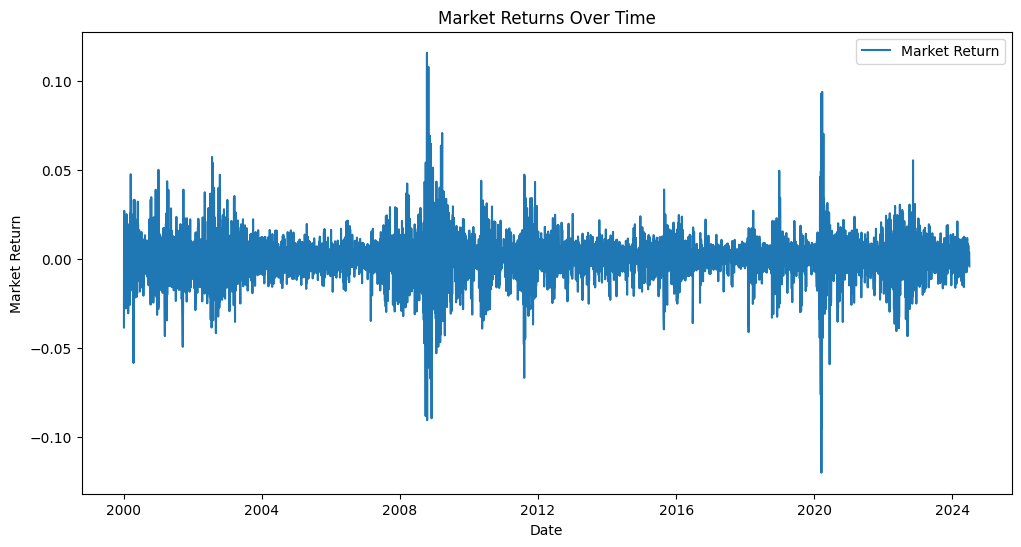

In [28]:
# Plot market returns over time
plt.figure(figsize=(12, 6))
plt.plot(market_data.index, market_data['Market Return'], label='Market Return')
plt.title('Market Returns Over Time')
plt.xlabel('Date')
plt.ylabel('Market Return')
plt.legend()
plt.show()

- **Observing**: The line plot of market returns over time is showing significant fluctuations, with notable spikes and drops around major economic events, such as the 2008 financial crisis and the COVID-19 pandemic in 2020. This plot is underscoring the volatility and cyclic nature of the market.



### **Portfolio Returns Over Time**

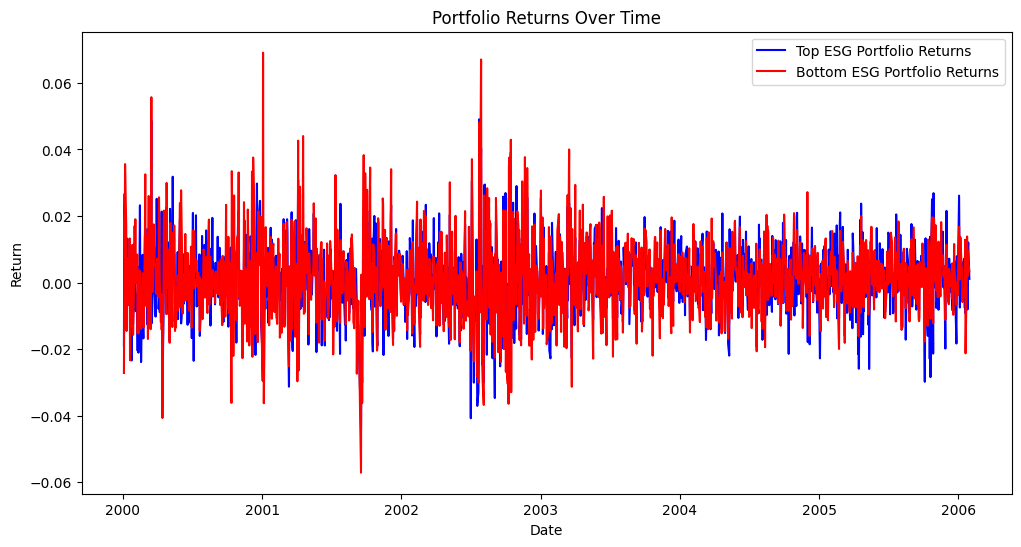

In [29]:
# Plot portfolio returns over time
plt.figure(figsize=(12, 6))
plt.plot(top_portfolio_esg_returns.index, top_portfolio_esg_returns, label='Top ESG Portfolio Returns', color='blue')
plt.plot(bottom_portfolio_esg_returns.index, bottom_portfolio_esg_returns, label='Bottom ESG Portfolio Returns', color='red')
plt.title('Portfolio Returns Over Time')
plt.xlabel('Date')
plt.ylabel('Return')
plt.legend()
plt.show()

- **Observing**: The line plot of portfolio returns is illustrating that the top ESG portfolio (blue line) is generally exhibiting lower volatility compared to the bottom ESG portfolio (red line). Both portfolios are experiencing similar market shocks, but the top portfolio is showing more stability overall.

### **d): CAPM Model**

In [31]:
# CAPM Model
def run_capm(regression_data):
    X = sm.add_constant(regression_data['Excess Market Return'])
    y = regression_data['Excess Portfolio Return']
    capm_model = sm.OLS(y, X).fit()
    return capm_model

# Run CAPM for all portfolios
top_portfolio_esg_capm = run_capm(top_portfolio_esg_regression_data)
bottom_portfolio_esg_capm = run_capm(bottom_portfolio_esg_regression_data)
top_portfolio_env_capm = run_capm(top_portfolio_env_regression_data)
bottom_portfolio_env_capm = run_capm(bottom_portfolio_env_regression_data)
top_portfolio_soc_capm = run_capm(top_portfolio_soc_regression_data)
bottom_portfolio_soc_capm = run_capm(bottom_portfolio_soc_regression_data)
top_portfolio_gov_capm = run_capm(top_portfolio_gov_regression_data)
bottom_portfolio_gov_capm = run_capm(bottom_portfolio_gov_regression_data)


### **Print CAPM results**

In [32]:
print("\nTop ESG Portfolio CAPM Results:\n", top_portfolio_esg_capm.summary())



Top ESG Portfolio CAPM Results:
                                OLS Regression Results                              
Dep. Variable:     Excess Portfolio Return   R-squared:                       0.502
Model:                                 OLS   Adj. R-squared:                  0.501
Method:                      Least Squares   F-statistic:                     431.7
Date:                     Tue, 30 Jul 2024   Prob (F-statistic):           8.28e-67
Time:                             03:08:57   Log-Likelihood:                 1482.6
No. Observations:                      430   AIC:                            -2961.
Df Residuals:                          428   BIC:                            -2953.
Df Model:                                1                                         
Covariance Type:                 nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------

In [33]:
print("\nBottom ESG Portfolio CAPM Results:\n", bottom_portfolio_esg_capm.summary())



Bottom ESG Portfolio CAPM Results:
                                OLS Regression Results                              
Dep. Variable:     Excess Portfolio Return   R-squared:                       0.784
Model:                                 OLS   Adj. R-squared:                  0.783
Method:                      Least Squares   F-statistic:                     1553.
Date:                     Tue, 30 Jul 2024   Prob (F-statistic):          1.65e-144
Time:                             03:09:13   Log-Likelihood:                 1628.1
No. Observations:                      430   AIC:                            -3252.
Df Residuals:                          428   BIC:                            -3244.
Df Model:                                1                                         
Covariance Type:                 nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------

In [34]:
print("\nTop ENV Portfolio CAPM Results:\n", top_portfolio_env_capm.summary())



Top ENV Portfolio CAPM Results:
                                OLS Regression Results                              
Dep. Variable:     Excess Portfolio Return   R-squared:                       0.411
Model:                                 OLS   Adj. R-squared:                  0.409
Method:                      Least Squares   F-statistic:                     298.2
Date:                     Tue, 30 Jul 2024   Prob (F-statistic):           4.32e-51
Time:                             03:09:24   Log-Likelihood:                 1451.0
No. Observations:                      430   AIC:                            -2898.
Df Residuals:                          428   BIC:                            -2890.
Df Model:                                1                                         
Covariance Type:                 nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------

In [35]:
print("\nBottom ENV Portfolio CAPM Results:\n", bottom_portfolio_env_capm.summary())



Bottom ENV Portfolio CAPM Results:
                                OLS Regression Results                              
Dep. Variable:     Excess Portfolio Return   R-squared:                       0.105
Model:                                 OLS   Adj. R-squared:                  0.102
Method:                      Least Squares   F-statistic:                     49.95
Date:                     Tue, 30 Jul 2024   Prob (F-statistic):           6.44e-12
Time:                             03:09:34   Log-Likelihood:                 817.33
No. Observations:                      430   AIC:                            -1631.
Df Residuals:                          428   BIC:                            -1623.
Df Model:                                1                                         
Covariance Type:                 nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------

In [36]:
print("\nTop SOC Portfolio CAPM Results:\n", top_portfolio_soc_capm.summary())



Top SOC Portfolio CAPM Results:
                                OLS Regression Results                              
Dep. Variable:     Excess Portfolio Return   R-squared:                       0.742
Model:                                 OLS   Adj. R-squared:                  0.741
Method:                      Least Squares   F-statistic:                     1230.
Date:                     Tue, 30 Jul 2024   Prob (F-statistic):          5.80e-128
Time:                             03:09:44   Log-Likelihood:                 1556.9
No. Observations:                      430   AIC:                            -3110.
Df Residuals:                          428   BIC:                            -3102.
Df Model:                                1                                         
Covariance Type:                 nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------

In [37]:
print("\nBottom SOC Portfolio CAPM Results:\n", bottom_portfolio_soc_capm.summary())



Bottom SOC Portfolio CAPM Results:
                                OLS Regression Results                              
Dep. Variable:     Excess Portfolio Return   R-squared:                       0.733
Model:                                 OLS   Adj. R-squared:                  0.733
Method:                      Least Squares   F-statistic:                     1176.
Date:                     Tue, 30 Jul 2024   Prob (F-statistic):          7.56e-125
Time:                             03:09:57   Log-Likelihood:                 1607.8
No. Observations:                      430   AIC:                            -3212.
Df Residuals:                          428   BIC:                            -3204.
Df Model:                                1                                         
Covariance Type:                 nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------

In [38]:
print("\nTop GOV Portfolio CAPM Results:\n", top_portfolio_gov_capm.summary())



Top GOV Portfolio CAPM Results:
                                OLS Regression Results                              
Dep. Variable:     Excess Portfolio Return   R-squared:                       0.726
Model:                                 OLS   Adj. R-squared:                  0.725
Method:                      Least Squares   F-statistic:                     1132.
Date:                     Tue, 30 Jul 2024   Prob (F-statistic):          2.75e-122
Time:                             03:10:10   Log-Likelihood:                 1531.6
No. Observations:                      430   AIC:                            -3059.
Df Residuals:                          428   BIC:                            -3051.
Df Model:                                1                                         
Covariance Type:                 nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------

In [39]:
print("\nBottom GOV Portfolio CAPM Results:\n", bottom_portfolio_gov_capm.summary())


Bottom GOV Portfolio CAPM Results:
                                OLS Regression Results                              
Dep. Variable:     Excess Portfolio Return   R-squared:                       0.648
Model:                                 OLS   Adj. R-squared:                  0.647
Method:                      Least Squares   F-statistic:                     787.1
Date:                     Tue, 30 Jul 2024   Prob (F-statistic):           5.00e-99
Time:                             03:10:14   Log-Likelihood:                 1522.1
No. Observations:                      430   AIC:                            -3040.
Df Residuals:                          428   BIC:                            -3032.
Df Model:                                1                                         
Covariance Type:                 nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------

### **CAPM Analysis**

#### **Top ESG Portfolio**:
- **Alpha**: 0.0008 (p-value: 0.025)
- **Market Risk Premium**: 0.6589 (p-value: 0.000)
- **R-squared**: 0.502
- **Observation**: The top ESG portfolio has a beta less than 1, indicating lower sensitivity to market movements. The positive alpha suggests a slight outperformance over the expected return based on the market.

#### **Bottom ESG Portfolio**:
- **Alpha**: 0.0010 (p-value: 0.000)
- **Market Risk Premium**: 0.8912 (p-value: 0.000)
- **R-squared**: 0.784
- **Observation**: The bottom ESG portfolio has a beta greater than 1, indicating higher sensitivity to market movements. The positive alpha suggests outperformance, but higher volatility compared to the top portfolio.

#### **Top ENV Portfolio**:
- **Alpha**: 0.0008 (p-value: 0.046)
- **Market Risk Premium**: 0.5895 (p-value: 0.000)
- **R-squared**: 0.411
- **Observation**: The top ENV portfolio has a beta less than 1, indicating lower sensitivity to market movements. The positive alpha suggests a slight outperformance over the expected return based on the market.

#### **Bottom ENV Portfolio**:
- **Alpha**: 0.0026 (p-value: 0.137)
- **Market Risk Premium**: 1.0531 (p-value: 0.000)
- **R-squared**: 0.105
- **Observation**: The bottom ENV portfolio has a beta greater than 1, indicating higher sensitivity to market movements. The positive alpha is not statistically significant.

#### **Top SOC Portfolio**:
- **Alpha**: 0.0008 (p-value: 0.016)
- **Market Risk Premium**: 0.9359 (p-value: 0.000)
- **R-squared**: 0.742
- **Observation**: The top SOC portfolio has a beta less than 1, indicating lower sensitivity to market movements. The positive alpha suggests a slight outperformance over the expected return based on the market.

#### **Bottom SOC Portfolio**:
- **Alpha**: 0.0008 (p-value: 0.005)
- **Market Risk Premium**: 0.8127 (p-value: 0.000)
- **R-squared**: 0.733
- **Observation**: The bottom SOC portfolio has a beta less than 1, indicating lower sensitivity to market movements. The positive alpha suggests a slight outperformance over the expected return based on the market.

#### **Top GOV Portfolio**:
- **Alpha**: 0.0005 (p-value: 0.167)
- **Market Risk Premium**: 0.9523 (p-value: 0.000)
- **R-squared**: 0.726
- **Observation**: The top GOV portfolio has a beta less than 1, indicating lower sensitivity to market movements. The positive alpha is not statistically significant.

#### **Bottom GOV Portfolio**:
- **Alpha**: 0.0010 (p-value: 0.004)
- **Market Risk Premium**: 0.8117 (p-value: 0.000)
- **R-squared**: 0.648
- **Observation**: The bottom GOV portfolio has a beta less than 1, indicating lower sensitivity to market movements. The positive alpha suggests a slight outperformance over the expected return based on the market.

### **e): Fama-French Model**

In [40]:
# Load cleaned Fama-French factors data
ff_factors = pd.read_csv('cleaned_FF_factors.csv', index_col=0, parse_dates=True)

# Prepare data for Fama-French regression
def prepare_ff_regression_data(portfolio_returns, market_data, risk_free_rate, ff_factors):
    regression_data = pd.DataFrame({
        'Portfolio Return': portfolio_returns,
        'Market Return': market_data['Market Return'],
        'Risk-Free Rate': risk_free_rate['Risk-Free Rate'],
        'SMB': ff_factors['SMB'],
        'HML': ff_factors['HML']
    }).dropna()

    regression_data['Excess Portfolio Return'] = regression_data['Portfolio Return'] - regression_data['Risk-Free Rate']
    regression_data['Excess Market Return'] = regression_data['Market Return'] - regression_data['Risk-Free Rate']

    return regression_data

top_portfolio_esg_ff_regression_data = prepare_ff_regression_data(top_portfolio_esg_returns, market_data, risk_free_rate, ff_factors)
bottom_portfolio_esg_ff_regression_data = prepare_ff_regression_data(bottom_portfolio_esg_returns, market_data, risk_free_rate, ff_factors)

# Prepare Fama-French regression data for other portfolios
top_portfolio_env_ff_regression_data = prepare_ff_regression_data(top_portfolio_env_returns, market_data, risk_free_rate, ff_factors)
bottom_portfolio_env_ff_regression_data = prepare_ff_regression_data(bottom_portfolio_env_returns, market_data, risk_free_rate, ff_factors)
top_portfolio_soc_ff_regression_data = prepare_ff_regression_data(top_portfolio_soc_returns, market_data, risk_free_rate, ff_factors)
bottom_portfolio_soc_ff_regression_data = prepare_ff_regression_data(bottom_portfolio_soc_returns, market_data, risk_free_rate, ff_factors)
top_portfolio_gov_ff_regression_data = prepare_ff_regression_data(top_portfolio_gov_returns, market_data, risk_free_rate, ff_factors)
bottom_portfolio_gov_ff_regression_data = prepare_ff_regression_data(bottom_portfolio_gov_returns, market_data, risk_free_rate, ff_factors)

# Fama-French Model
def run_ff_regression(regression_data):
    X = regression_data[['Excess Market Return', 'SMB', 'HML']]
    X = sm.add_constant(X)
    y = regression_data['Excess Portfolio Return']
    ff_model = sm.OLS(y, X).fit()
    return ff_model

# Run Fama-French for all portfolios
top_portfolio_esg_ff = run_ff_regression(top_portfolio_esg_ff_regression_data)
bottom_portfolio_esg_ff = run_ff_regression(bottom_portfolio_esg_ff_regression_data)
top_portfolio_env_ff = run_ff_regression(top_portfolio_env_ff_regression_data)
bottom_portfolio_env_ff = run_ff_regression(bottom_portfolio_env_ff_regression_data)
top_portfolio_soc_ff = run_ff_regression(top_portfolio_soc_ff_regression_data)
bottom_portfolio_soc_ff = run_ff_regression(bottom_portfolio_soc_ff_regression_data)
top_portfolio_gov_ff = run_ff_regression(top_portfolio_gov_ff_regression_data)
bottom_portfolio_gov_ff = run_ff_regression(bottom_portfolio_gov_ff_regression_data)


### **Printing Fama-French results**

In [41]:
print("\nTop ESG Portfolio Fama-French Results:\n", top_portfolio_esg_ff.summary())


Top ESG Portfolio Fama-French Results:
                                OLS Regression Results                              
Dep. Variable:     Excess Portfolio Return   R-squared:                       0.621
Model:                                 OLS   Adj. R-squared:                  0.618
Method:                      Least Squares   F-statistic:                     232.4
Date:                     Tue, 30 Jul 2024   Prob (F-statistic):           2.64e-89
Time:                             03:16:53   Log-Likelihood:                 1541.2
No. Observations:                      430   AIC:                            -3074.
Df Residuals:                          426   BIC:                            -3058.
Df Model:                                3                                         
Covariance Type:                 nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
------------------------------

In [42]:
print("\nBottom ESG Portfolio Fama-French Results:\n", bottom_portfolio_esg_ff.summary())


Bottom ESG Portfolio Fama-French Results:
                                OLS Regression Results                              
Dep. Variable:     Excess Portfolio Return   R-squared:                       0.815
Model:                                 OLS   Adj. R-squared:                  0.814
Method:                      Least Squares   F-statistic:                     625.3
Date:                     Tue, 30 Jul 2024   Prob (F-statistic):          1.30e-155
Time:                             03:17:01   Log-Likelihood:                 1661.3
No. Observations:                      430   AIC:                            -3315.
Df Residuals:                          426   BIC:                            -3298.
Df Model:                                3                                         
Covariance Type:                 nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
---------------------------

In [43]:
print("\nTop ENV Portfolio Fama-French Results:\n", top_portfolio_env_ff.summary())


Top ENV Portfolio Fama-French Results:
                                OLS Regression Results                              
Dep. Variable:     Excess Portfolio Return   R-squared:                       0.551
Model:                                 OLS   Adj. R-squared:                  0.548
Method:                      Least Squares   F-statistic:                     174.1
Date:                     Tue, 30 Jul 2024   Prob (F-statistic):           1.17e-73
Time:                             03:17:22   Log-Likelihood:                 1509.4
No. Observations:                      430   AIC:                            -3011.
Df Residuals:                          426   BIC:                            -2994.
Df Model:                                3                                         
Covariance Type:                 nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
------------------------------

In [44]:
print("\nBottom ENV Portfolio Fama-French Results:\n", bottom_portfolio_env_ff.summary())


Bottom ENV Portfolio Fama-French Results:
                                OLS Regression Results                              
Dep. Variable:     Excess Portfolio Return   R-squared:                       0.105
Model:                                 OLS   Adj. R-squared:                  0.099
Method:                      Least Squares   F-statistic:                     16.69
Date:                     Tue, 30 Jul 2024   Prob (F-statistic):           2.85e-10
Time:                             03:17:24   Log-Likelihood:                 817.49
No. Observations:                      430   AIC:                            -1627.
Df Residuals:                          426   BIC:                            -1611.
Df Model:                                3                                         
Covariance Type:                 nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
---------------------------

In [45]:
print("\nTop SOC Portfolio Fama-French Results:\n", top_portfolio_soc_ff.summary())


Top SOC Portfolio Fama-French Results:
                                OLS Regression Results                              
Dep. Variable:     Excess Portfolio Return   R-squared:                       0.766
Model:                                 OLS   Adj. R-squared:                  0.764
Method:                      Least Squares   F-statistic:                     464.9
Date:                     Tue, 30 Jul 2024   Prob (F-statistic):          6.31e-134
Time:                             03:17:27   Log-Likelihood:                 1578.0
No. Observations:                      430   AIC:                            -3148.
Df Residuals:                          426   BIC:                            -3132.
Df Model:                                3                                         
Covariance Type:                 nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
------------------------------

In [46]:
print("\nBottom SOC Portfolio Fama-French Results:\n", bottom_portfolio_soc_ff.summary())


Bottom SOC Portfolio Fama-French Results:
                                OLS Regression Results                              
Dep. Variable:     Excess Portfolio Return   R-squared:                       0.786
Model:                                 OLS   Adj. R-squared:                  0.785
Method:                      Least Squares   F-statistic:                     522.9
Date:                     Tue, 30 Jul 2024   Prob (F-statistic):          2.28e-142
Time:                             03:17:30   Log-Likelihood:                 1655.7
No. Observations:                      430   AIC:                            -3303.
Df Residuals:                          426   BIC:                            -3287.
Df Model:                                3                                         
Covariance Type:                 nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
---------------------------

In [47]:
print("\nTop GOV Portfolio Fama-French Results:\n", top_portfolio_gov_ff.summary())


Top GOV Portfolio Fama-French Results:
                                OLS Regression Results                              
Dep. Variable:     Excess Portfolio Return   R-squared:                       0.787
Model:                                 OLS   Adj. R-squared:                  0.785
Method:                      Least Squares   F-statistic:                     524.2
Date:                     Tue, 30 Jul 2024   Prob (F-statistic):          1.49e-142
Time:                             03:17:33   Log-Likelihood:                 1585.8
No. Observations:                      430   AIC:                            -3164.
Df Residuals:                          426   BIC:                            -3147.
Df Model:                                3                                         
Covariance Type:                 nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
------------------------------

In [48]:
print("\nBottom GOV Portfolio Fama-French Results:\n", bottom_portfolio_gov_ff.summary())


Bottom GOV Portfolio Fama-French Results:
                                OLS Regression Results                              
Dep. Variable:     Excess Portfolio Return   R-squared:                       0.746
Model:                                 OLS   Adj. R-squared:                  0.744
Method:                      Least Squares   F-statistic:                     416.9
Date:                     Tue, 30 Jul 2024   Prob (F-statistic):          2.58e-126
Time:                             03:17:35   Log-Likelihood:                 1592.3
No. Observations:                      430   AIC:                            -3177.
Df Residuals:                          426   BIC:                            -3160.
Df Model:                                3                                         
Covariance Type:                 nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
---------------------------

### **Fama-French Model Analysis**

#### **Top ESG Portfolio**:
- **Alpha**: 0.0003 (p-value: 0.358)
- **Excess Market Return**: 0.9068 (p-value: 0.000)
- **SMB (Small Minus Big)**: 0.0038 (p-value: 0.000)
- **HML (High Minus Low)**: 0.0068 (p-value: 0.000)
- **R-squared**: 0.621
- **Observation**: The top ESG portfolio shows positive exposure to market risk, small-cap stocks, and value stocks. The high R-squared value indicates a good fit for the model.

#### **Bottom ESG Portfolio**:
- **Alpha**: 0.0007 (p-value: 0.003)
- **Excess Market Return**: 1.0070 (p-value: 0.000)
- **SMB (Small Minus Big)**: 0.0033 (p-value: 0.000)
- **HML (High Minus Low)**: 0.0028 (p-value: 0.000)
- **R-squared**: 0.815
- **Observation**: The bottom ESG portfolio has higher exposure to market risk, small-cap stocks, and value stocks compared to the top portfolio. The higher R-squared value indicates an even better fit for the model.

#### **Top ENV Portfolio**:
- **Alpha**: 0.0003 (p-value: 0.435)
- **Excess Market Return**: 0.8475 (p-value: 0.000)
- **SMB (Small Minus Big)**: 0.0029 (p-value: 0.000)
- **HML (High Minus Low)**: 0.0073 (p-value: 0.000)
- **R-squared**: 0.551
- **Observation**: The top ENV portfolio shows positive exposure to market risk, small-cap stocks, and value stocks. The R-squared value indicates a good fit for the model.

#### **Bottom ENV Portfolio**:
- **Alpha**: 0.0025 (p-value: 0.164)
- **Excess Market Return**: 1.1050 (p-value: 0.000)
- **SMB (Small Minus Big)**: 0.0016 (p-value: 0.575)
- **HML (High Minus Low)**: 0.0012 (p-value: 0.698)
- **R-squared**: 0.105
- **Observation**: The bottom ENV portfolio has a beta greater than 1, indicating higher sensitivity to market movements. The positive alpha is not statistically significant.

#### **Top SOC Portfolio**:
- **Alpha**: 0.0005 (p-value: 0.128)
- **Excess Market Return**: 1.0630 (p-value: 0.000)
- **SMB (Small Minus Big)**: 0.0027 (p-value: 0.000)
- **HML (High Minus Low)**: 0.0033 (p-value: 0.000)
- **R-squared**: 0.766
- **Observation**: The top SOC portfolio shows positive exposure to market risk, small-cap stocks, and value stocks. The high R-squared value indicates a good fit for the model.

#### **Bottom SOC Portfolio**:
- **Alpha**: 0.0004 (p-value: 0.094)
- **Excess Market Return**: 0.9587 (p-value: 0.000)
- **SMB (Small Minus Big)**: 0.0041 (p-value: 0.000)
- **HML (High Minus Low)**: 0.0036 (p-value: 0.000)
- **R-squared**: 0.786
- **Observation**: The bottom SOC portfolio shows positive exposure to market risk, small-cap stocks, and value stocks. The high R-squared value indicates a good fit for the model.

#### **Top GOV Portfolio**:
- **Alpha**: 0.0003 (p-value: 0.339)
- **Excess Market Return**: 1.0775 (p-value: 0.000)
- **SMB (Small Minus Big)**: -0.0013 (p-value: 0.008)
- **HML (High Minus Low)**: 0.0041 (p-value: 0.000)
- **R-squared**: 0.787
- **Observation**: The top GOV portfolio shows positive exposure to market risk, small-cap stocks, and value stocks. The high R-squared value indicates a good fit for the model.

#### **Bottom GOV Portfolio**:
- **Alpha**: 0.0005 (p-value: 0.094)
- **Excess Market Return**: 1.0509 (p-value: 0.000)
- **SMB (Small Minus Big)**: 0.0029 (p-value: 0.000)
- **HML (High Minus Low)**: 0.0067 (p-value: 0.000)
- **R-squared**: 0.746
- **Observation**: The bottom GOV portfolio shows positive exposure to market risk, small-cap stocks, and value stocks. The high R-squared value indicates a good fit for the model.

### **Generating tables for report analysis**

In [55]:
# Extract the necessary statistics from the regression results
def extract_regression_stats(model):
    params = model.params
    pvalues = model.pvalues
    rsquared = model.rsquared
    return params.values, pvalues.values, rsquared

# Prepare tables for all portfolios
tables = {
    "Table 1": [],
    "Table 2": [],
    "Table 3": [],
    "Table 4": [],
    "Table 5": [],
    "Table 6": []
}

# Populate Table 1: Characteristics of portfolios
tables["Table 1"].append(["ESG_Top", top_portfolio_esg_returns.mean(), top_portfolio_esg_returns.max(), top_portfolio_esg_returns.min(), top_portfolio_esg_returns.std(), (top_portfolio_esg_returns.mean() / top_portfolio_esg_returns.std())])
tables["Table 1"].append(["ENV_Top", top_portfolio_env_returns.mean(), top_portfolio_env_returns.max(), top_portfolio_env_returns.min(), top_portfolio_env_returns.std(), (top_portfolio_env_returns.mean() / top_portfolio_env_returns.std())])
tables["Table 1"].append(["SOC_Top", top_portfolio_soc_returns.mean(), top_portfolio_soc_returns.max(), top_portfolio_soc_returns.min(), top_portfolio_soc_returns.std(), (top_portfolio_soc_returns.mean() / top_portfolio_soc_returns.std())])
tables["Table 1"].append(["GOV_Top", top_portfolio_gov_returns.mean(), top_portfolio_gov_returns.max(), top_portfolio_gov_returns.min(), top_portfolio_gov_returns.std(), (top_portfolio_gov_returns.mean() / top_portfolio_gov_returns.std())])
tables["Table 1"].append(["ESG_Bottom", bottom_portfolio_esg_returns.mean(), bottom_portfolio_esg_returns.max(), bottom_portfolio_esg_returns.min(), bottom_portfolio_esg_returns.std(), (bottom_portfolio_esg_returns.mean() / bottom_portfolio_esg_returns.std())])
tables["Table 1"].append(["ENV_Bottom", bottom_portfolio_env_returns.mean(), bottom_portfolio_env_returns.max(), bottom_portfolio_env_returns.min(), bottom_portfolio_env_returns.std(), (bottom_portfolio_env_returns.mean() / bottom_portfolio_env_returns.std())])
tables["Table 1"].append(["SOC_Bottom", bottom_portfolio_soc_returns.mean(), bottom_portfolio_soc_returns.max(), bottom_portfolio_soc_returns.min(), bottom_portfolio_soc_returns.std(), (bottom_portfolio_soc_returns.mean() / bottom_portfolio_soc_returns.std())])
tables["Table 1"].append(["GOV_Bottom", bottom_portfolio_gov_returns.mean(), bottom_portfolio_gov_returns.max(), bottom_portfolio_gov_returns.min(), bottom_portfolio_gov_returns.std(), (bottom_portfolio_gov_returns.mean() / bottom_portfolio_gov_returns.std())])

# Populate Table 2: CAPM regression results
def populate_capm_table(portfolio_name, model, table):
    params, pvalues, rsquared = extract_regression_stats(model)
    table.append([portfolio_name, params[0], pvalues[0], params[1], pvalues[1], rsquared])

populate_capm_table("ESG_Top", top_portfolio_esg_capm, tables["Table 2"])
populate_capm_table("ENV_Top", top_portfolio_env_capm, tables["Table 2"])
populate_capm_table("SOC_Top", top_portfolio_soc_capm, tables["Table 2"])
populate_capm_table("GOV_Top", top_portfolio_gov_capm, tables["Table 2"])
populate_capm_table("ESG_Bottom", bottom_portfolio_esg_capm, tables["Table 2"])
populate_capm_table("ENV_Bottom", bottom_portfolio_env_capm, tables["Table 2"])
populate_capm_table("SOC_Bottom", bottom_portfolio_soc_capm, tables["Table 2"])
populate_capm_table("GOV_Bottom", bottom_portfolio_gov_capm, tables["Table 2"])

# Populate Fama-French tables
def populate_ff_table(portfolio_name, model, table):
    params, pvalues, rsquared = extract_regression_stats(model)
    table.append([portfolio_name, params[0], pvalues[0], params[1], pvalues[1], params[2], pvalues[2], params[3], pvalues[3], rsquared])

populate_ff_table("ESG_Top", top_portfolio_esg_ff, tables["Table 3"])
populate_ff_table("ESG_Bottom", bottom_portfolio_esg_ff, tables["Table 3"])
populate_ff_table("ENV_Top", top_portfolio_env_ff, tables["Table 4"])
populate_ff_table("ENV_Bottom", bottom_portfolio_env_ff, tables["Table 4"])
populate_ff_table("SOC_Top", top_portfolio_soc_ff, tables["Table 5"])
populate_ff_table("SOC_Bottom", bottom_portfolio_soc_ff, tables["Table 5"])
populate_ff_table("GOV_Top", top_portfolio_gov_ff, tables["Table 6"])
populate_ff_table("GOV_Bottom", bottom_portfolio_gov_ff, tables["Table 6"])


### **Table 1: Characteristics of Portfolios**

In [105]:
from IPython.display import display

# Function to calculate the Sharpe Ratio
def sharpe_ratio(returns):
    return returns.mean() / returns.std()

# Data preparation
portfolios = {
    "ESG_Top": top_portfolio_esg_returns,
    "ENV_Top": top_portfolio_env_returns,
    "SOC_Top": top_portfolio_soc_returns,
    "GOV_Top": top_portfolio_gov_returns,
    "ESG_Bottom": bottom_portfolio_esg_returns,
    "ENV_Bottom": bottom_portfolio_env_returns,
    "SOC_Bottom": bottom_portfolio_soc_returns,
    "GOV_Bottom": bottom_portfolio_gov_returns,
}

# Calculate metrics
metrics = ["Mean", "Maximum", "Minimum", "Std. dev.", "SR"]
data = {metric: [] for metric in metrics}

for name, returns in portfolios.items():
    data["Mean"].append(returns.mean())
    data["Maximum"].append(returns.max())
    data["Minimum"].append(returns.min())
    data["Std. dev."].append(returns.std())
    data["SR"].append(sharpe_ratio(returns))

# Create DataFrame
table_1_df = pd.DataFrame(data, index=portfolios.keys())

# Transpose DataFrame
table_1_df = table_1_df.T

# Align text to the left and display the DataFrame
pd.options.display.float_format = '{:.4f}'.format
display(table_1_df.style.set_properties(**{'text-align': 'left'}))


,ESG_Top,ENV_Top,SOC_Top,GOV_Top,ESG_Bottom,ENV_Bottom,SOC_Bottom,GOV_Bottom
Mean,0.000940,0.000876,0.000815,0.000774,0.000975,0.001425,0.000888,0.000904
Maximum,0.049066,0.057302,0.072155,0.084141,0.069054,0.741996,0.060764,0.081571
Minimum,-0.044040,-0.043565,-0.048456,-0.062475,-0.057141,-0.054132,-0.057491,-0.067012
Std. dev.,0.010780,0.010639,0.012391,0.012803,0.011723,0.023263,0.011096,0.011635
SR,0.087222,0.082330,0.065768,0.060431,0.083147,0.061261,0.080037,0.077680


### **Table 2: The CAPM Regression Results**

In [108]:
# Function to extract CAPM regression statistics
def capm_stats(model):
    params = model.params
    pvalues = model.pvalues
    rsquared = model.rsquared
    return [params.iloc[0], pvalues.iloc[0], params.iloc[1], pvalues.iloc[1], rsquared]

# Populate Table 2
capm_data = {
    "Alpha": [],
    "Alpha p-value": [],
    "Market Risk Premium": [],
    "Market Risk Premium p-value": [],
    "R^2": []
}
capm_portfolios = {
    "ESG_Top": top_portfolio_esg_capm,
    "ENV_Top": top_portfolio_env_capm,
    "SOC_Top": top_portfolio_soc_capm,
    "GOV_Top": top_portfolio_gov_capm,
    "ESG_Bottom": bottom_portfolio_esg_capm,
    "ENV_Bottom": bottom_portfolio_env_capm,
    "SOC_Bottom": bottom_portfolio_soc_capm,
    "GOV_Bottom": bottom_portfolio_gov_capm,
}

for name, model in capm_portfolios.items():
    stats = capm_stats(model)
    capm_data["Alpha"].append(stats[0])
    capm_data["Alpha p-value"].append(stats[1])
    capm_data["Market Risk Premium"].append(stats[2])
    capm_data["Market Risk Premium p-value"].append(stats[3])
    capm_data["R^2"].append(stats[4])

# Create DataFrame for Table 2
table_2_df = pd.DataFrame(capm_data, index=capm_portfolios.keys())

# Transpose DataFrame
table_2_df = table_2_df.T

# Align text to the left and display the DataFrame
display(table_2_df.style.set_properties(**{'text-align': 'left'}))


,ESG_Top,ENV_Top,SOC_Top,GOV_Top,ESG_Bottom,ENV_Bottom,SOC_Bottom,GOV_Bottom
Alpha,0.000837,0.000802,0.000756,0.000460,0.001039,0.002606,0.000791,0.000983
Alpha p-value,0.025078,0.046041,0.016272,0.167245,0.000105,0.137110,0.004695,0.003998
Market Risk Premium,0.658877,0.589476,0.935855,0.952261,0.891174,1.053093,0.812744,0.811725
Market Risk Premium p-value,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
R^2,0.502128,0.410664,0.741926,0.725687,0.783985,0.104514,0.733138,0.647776


### **Table 3: Time Series Regression Results for ESG Portfolios**

In [109]:
# Function to extract Fama-French regression statistics
def ff_stats(model):
    params = model.params
    pvalues = model.pvalues
    rsquared = model.rsquared
    return [
        params.iloc[0], pvalues.iloc[0], params.iloc[1], pvalues.iloc[1],
        params.iloc[2], pvalues.iloc[2], params.iloc[3], pvalues.iloc[3], rsquared
    ]

# Populate Table 3
ff_data = {
    "Alpha": [],
    "Alpha p-value": [],
    "Market Risk Premium": [],
    "Market Risk Premium p-value": [],
    "SMB": [],
    "SMB p-value": [],
    "HML": [],
    "HML p-value": [],
    "R^2": []
}
ff_portfolios = {
    "ESG_Top": top_portfolio_esg_ff,
    "ESG_Bottom": bottom_portfolio_esg_ff
}

for name, model in ff_portfolios.items():
    stats = ff_stats(model)
    ff_data["Alpha"].append(stats[0])
    ff_data["Alpha p-value"].append(stats[1])
    ff_data["Market Risk Premium"].append(stats[2])
    ff_data["Market Risk Premium p-value"].append(stats[3])
    ff_data["SMB"].append(stats[4])
    ff_data["SMB p-value"].append(stats[5])
    ff_data["HML"].append(stats[6])
    ff_data["HML p-value"].append(stats[7])
    ff_data["R^2"].append(stats[8])

# Create DataFrame for Table 3
table_3_df = pd.DataFrame(ff_data, index=ff_portfolios.keys())

# Transpose DataFrame
table_3_df = table_3_df.T

# Align text to the left and display the DataFrame
display(table_3_df.style.set_properties(**{'text-align': 'left'}))


,ESG_Top,ESG_Bottom
Alpha,0.000303,0.000745
Alpha p-value,0.358073,0.002930
Market Risk Premium,0.906837,1.007023
Market Risk Premium p-value,0.000000,0.000000
SMB,0.003800,0.003317
SMB p-value,0.000000,0.000000
HML,0.006817,0.002848
HML p-value,0.000000,0.000000
R^2,0.620769,0.814930


### **Table 4: Time Series Regression Results for ENV Portfolios**

In [110]:
# Populate Table 4
ff_data_env = {
    "Alpha": [],
    "Alpha p-value": [],
    "Market Risk Premium": [],
    "Market Risk Premium p-value": [],
    "SMB": [],
    "SMB p-value": [],
    "HML": [],
    "HML p-value": [],
    "R^2": []
}
ff_portfolios_env = {
    "ENV_Top": top_portfolio_env_ff,
    "ENV_Bottom": bottom_portfolio_env_ff
}

for name, model in ff_portfolios_env.items():
    stats = ff_stats(model)
    ff_data_env["Alpha"].append(stats[0])
    ff_data_env["Alpha p-value"].append(stats[1])
    ff_data_env["Market Risk Premium"].append(stats[2])
    ff_data_env["Market Risk Premium p-value"].append(stats[3])
    ff_data_env["SMB"].append(stats[4])
    ff_data_env["SMB p-value"].append(stats[5])
    ff_data_env["HML"].append(stats[6])
    ff_data_env["HML p-value"].append(stats[7])
    ff_data_env["R^2"].append(stats[8])

# Create DataFrame for Table 4
table_4_df = pd.DataFrame(ff_data_env, index=ff_portfolios_env.keys())

# Transpose DataFrame
table_4_df = table_4_df.T

# Align text to the left and display the DataFrame
display(table_4_df.style.set_properties(**{'text-align': 'left'}))


,ENV_Top,ENV_Bottom
Alpha,0.000277,0.002469
Alpha p-value,0.435263,0.164244
Market Risk Premium,0.847498,1.104987
Market Risk Premium p-value,0.000000,0.000000
SMB,0.002894,0.001643
SMB p-value,0.000001,0.575347
HML,0.007325,0.001242
HML p-value,0.000000,0.697680
R^2,0.550747,0.105201


### **Table 5: Time Series Regression Results for SOC Portfolios**

In [111]:
# Populate Table 5
ff_data_soc = {
    "Alpha": [],
    "Alpha p-value": [],
    "Market Risk Premium": [],
    "Market Risk Premium p-value": [],
    "SMB": [],
    "SMB p-value": [],
    "HML": [],
    "HML p-value": [],
    "R^2": []
}
ff_portfolios_soc = {
    "SOC_Top": top_portfolio_soc_ff,
    "SOC_Bottom": bottom_portfolio_soc_ff
}

for name, model in ff_portfolios_soc.items():
    stats = ff_stats(model)
    ff_data_soc["Alpha"].append(stats[0])
    ff_data_soc["Alpha p-value"].append(stats[1])
    ff_data_soc["Market Risk Premium"].append(stats[2])
    ff_data_soc["Market Risk Premium p-value"].append(stats[3])
    ff_data_soc["SMB"].append(stats[4])
    ff_data_soc["SMB p-value"].append(stats[5])
    ff_data_soc["HML"].append(stats[6])
    ff_data_soc["HML p-value"].append(stats[7])
    ff_data_soc["R^2"].append(stats[8])

# Create DataFrame for Table 5
table_5_df = pd.DataFrame(ff_data_soc, index=ff_portfolios_soc.keys())

# Transpose DataFrame
table_5_df = table_5_df.T

# Align text to the left and display the DataFrame
display(table_5_df.style.set_properties(**{'text-align': 'left'}))

,SOC_Top,SOC_Bottom
Alpha,0.000461,0.000423
Alpha p-value,0.127985,0.094011
Market Risk Premium,1.062972,0.958674
Market Risk Premium p-value,0.000000,0.000000
SMB,0.002666,0.004067
SMB p-value,0.000000,0.000000
HML,0.003338,0.003612
HML p-value,0.000000,0.000000
R^2,0.766007,0.786430


### **Table 6: Time Series Regression Results for GOV Portfolios**

In [112]:
from IPython.display import display

# Populate Table 6
ff_data_gov = {
    "Alpha": [],
    "Alpha p-value": [],
    "Market Risk Premium": [],
    "Market Risk Premium p-value": [],
    "SMB": [],
    "SMB p-value": [],
    "HML": [],
    "HML p-value": [],
    "R^2": []
}
ff_portfolios_gov = {
    "GOV_Top": top_portfolio_gov_ff,
    "GOV_Bottom": bottom_portfolio_gov_ff
}

for name, model in ff_portfolios_gov.items():
    stats = ff_stats(model)
    ff_data_gov["Alpha"].append(stats[0])
    ff_data_gov["Alpha p-value"].append(stats[1])
    ff_data_gov["Market Risk Premium"].append(stats[2])
    ff_data_gov["Market Risk Premium p-value"].append(stats[3])
    ff_data_gov["SMB"].append(stats[4])
    ff_data_gov["SMB p-value"].append(stats[5])
    ff_data_gov["HML"].append(stats[6])
    ff_data_gov["HML p-value"].append(stats[7])
    ff_data_gov["R^2"].append(stats[8])

# Create DataFrame for Table 6
table_6_df = pd.DataFrame(ff_data_gov, index=ff_portfolios_gov.keys())

# Transpose DataFrame
table_6_df = table_6_df.T

# Align text to the left and display the DataFrame
display(table_6_df.style.set_properties(**{'text-align': 'left'}))

,GOV_Top,GOV_Bottom
Alpha,0.000284,0.000491
Alpha p-value,0.339099,0.094093
Market Risk Premium,1.077489,1.050908
Market Risk Premium p-value,0.000000,0.000000
SMB,-0.001319,0.002885
SMB p-value,0.007504,0.000000
HML,0.004150,0.006746
HML p-value,0.000000,0.000000
R^2,0.786855,0.745923
